In [ ]:
''' 
Aim: Implement recurrent neural networks (RNNs) and LSTM networks for
sequence prediction tasks.

Sequence modelling:
Sequence modeling is the process of training a machine learning model to recognize
patterns and relationships in sequential data. It is widely used in tasks where the order of data
points matters, such as time-series forecasting, speech recognition, and text generation.

Types of sequence:
One-to-One – Simple input-output (e.g., image classification).
One-to-Many – Single input, multiple outputs (e.g., image captioning).
Many-to-One – Multiple inputs, single output (e.g., sentiment analysis).
Many-to-Many – Both input and output are sequences (e.g., machine translation)
'''

Epoch 1/20


c:\Users\Artophilic\anaconda3\envs\practvenv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0813 - val_loss: 6.4252e-04
Epoch 2/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.5862e-04 - val_loss: 1.0498e-04
Epoch 3/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8.6695e-05 - val_loss: 7.3202e-05
Epoch 4/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.7963e-05 - val_loss: 5.7330e-05
Epoch 5/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.7411e-05 - val_loss: 4.3528e-05
Epoch 6/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.1677e-05 - val_loss: 3.3358e-05
Epoch 7/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.8970e-05 - val_loss: 2.5446e-05
Epoch 8/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.1657e-05 - val_loss: 1.7715e-05
Epoch 9/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.8128e-05 - val_loss: 1.4981e-05
Epoch 10/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.3785e-05 - val_loss: 1.4839e-05
Epoch 11/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.0265e-05 - val_loss: 6.9964e-06
E

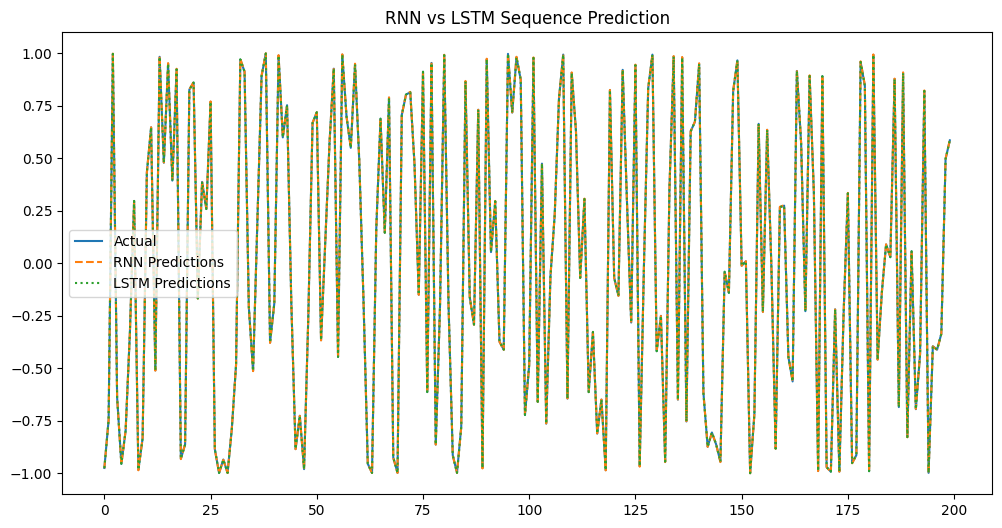

In [ ]:
#Importing libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, Dense
import matplotlib.pyplot as plt

#Generate a sine wave dataset
#Creating sequences of sine values and predicting the next value.
def generate_sine_wave(seq_length, num_samples):
    X, y = [], [] #X: Input sequence and y:Target values
    for _ in range(num_samples):
        start = np.random.rand() * 2 * np.pi
        seq = np.sin(np.linspace(start, start + seq_length * 0.1, seq_length))
        X.append(seq)
        y.append(np.sin(start + seq_length * 0.1)) # Predict next value
    return np.array(X), np.array(y)

# Prepare dataset
seq_length = 20
num_samples = 1000
X, y = generate_sine_wave(seq_length, num_samples)
X = X.reshape((X.shape[0], X.shape[1], 1)) #Reshaping the input X to 3D shape
            #(Samples, timesteps, features)

# Split into training and testing sets
split = int(0.8 * num_samples) #80% training data
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Build and train RNN model
def build_rnn_model():
    model = Sequential([
        #50 RNN units to process sequence
        SimpleRNN(50, activation='tanh', return_sequences=False, input_shape=(seq_length, 1)),
        #Final fully connected output layer
        Dense(1)
        ])
    model.compile(optimizer='adam', loss='mse') #Mean squared error loss
    return model

# Build and train LSTM model
def build_lstm_model():
    model = Sequential([
        #LSTM layer
        LSTM(50, activation='tanh', return_sequences=False, input_shape=(seq_length, 1)),
        Dense(1)
        ])
    model.compile(optimizer='adam', loss='mse')
    return model

# Train and evaluate RNN model
rnn_model = build_rnn_model()
rnn_model.fit(X_train, y_train, epochs=20, batch_size=16, verbose=1, validation_data=(X_test, y_test))
rnn_preds = rnn_model.predict(X_test)

# Train and evaluate LSTM model
lstm_model = build_lstm_model()
lstm_model.fit(X_train, y_train, epochs=20, batch_size=16, verbose=1,
validation_data=(X_test, y_test))
lstm_preds = lstm_model.predict(X_test)

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(rnn_preds, label='RNN Predictions', linestyle='dashed')
plt.plot(lstm_preds, label='LSTM Predictions', linestyle='dotted')
plt.legend()
plt.title("RNN vs LSTM Sequence Prediction")
plt.show()
